In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from IPython.display import HTML as html_print
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#get data
df=pd.read_csv("Indonesia.csv")

In [3]:
#define the curve fitting

#Logistic
def logistic_model(x, a, b, c):   
    return c / (1 + np.exp(-(x - b) / a)) #a=speed, b=day with max infection occur, c= max infected population

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [4]:
n_data = df.shape[0]
print(n_data)

20


In [5]:
xDate = df['Date'].tolist()
yCase = df['Case'].tolist()
initial_guess = 4, 100, 25000 # speed, peak, amplitude

In [31]:
df

,Date,Case
0,62,2
1,63,2
2,64,2
3,65,2
4,66,4
5,67,4
6,68,6
7,69,19
8,70,27
9,71,34


In [34]:
fit = curve_fit(logistic_model, xDate, yCase, p0=initial_guess, maxfev=9999)
speed, x_peak, y_max = fit[0]

In [8]:
speed_error, x_peak_error, y_max_error = [np.sqrt(fit[1][i][i]) for i in [0, 1, 2]]

In [9]:
print(speed_error,x_peak_error,y_max_error)

0.1894647784000747 1.3012334026406425 313.0717480639106


In [10]:
end = int(fsolve(lambda x: logistic_model(x, speed, x_peak, y_max) - y_max * 0.9999, x_peak))

In [11]:
sol = int(fsolve(lambda x : logistic_model(x, speed, x_peak, y_max) - int(y_max),x_peak))

In [50]:
tommorow_case = y_max / (1 + np.exp(-(81 - x_peak) / speed))

In [51]:
tommorow_case

451.469204757315

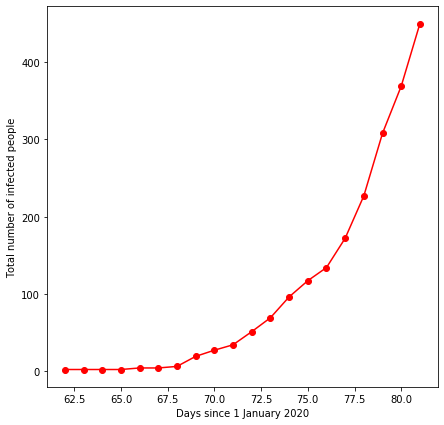

In [14]:
#Print the curve
pred_x = list(range(max(xDate),sol))
plt.rcParams['figure.figsize'] = [7, 7]
# Real data
plt.plot(xDate,yCase,'-o',label="Real data",color="red")
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.show()

In [15]:
fit_e = curve_fit(exponential_model, xDate, yCase,maxfev = 9999)

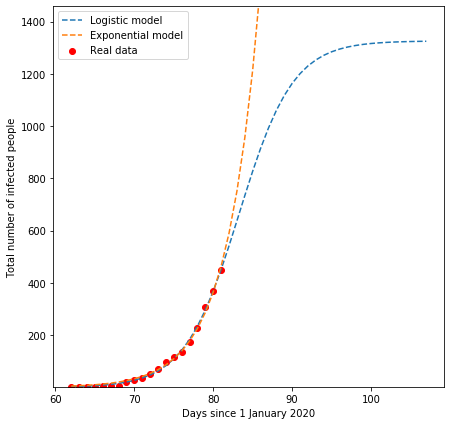

In [59]:
# Real data
plt.scatter(xDate,yCase,label="Real data",color="Red")
# Predicted logistic curve
plt.plot(xDate+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in xDate+pred_x],'--', label="Logistic model")
# Predicted exponential curve
plt.plot(xDate+pred_x, [exponential_model(i,fit_e[0][0],fit_e[0][1],fit_e[0][2]) for i in xDate+pred_x],'--', label="Exponential model")
plt.legend()
plt.xlabel("Days since 1 January 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(yCase),y_max*1.1))
#plt.figtext(0.4, 0.2," Prediction:" + "\n\n Maximum cases: " + str(int(round(y_max))) + " (± " + str(int(round(y_max_error))) + ")" + "\n Peak at calendar day: " + str(int(round(x_peak))) +" (± " + str(round(x_peak_error, 2)) + ")" +"\n Ending on calendar day: " + str(end)+"\n Tommorow:"+ str(int(round(tommorow_case)))+" cases")
#plt.savefig('curve.png')
plt.show()

In [17]:
y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in xDate]

In [20]:
fit_e = curve_fit(exponential_model, xDate, yCase,maxfev=9999)
y_pred_e = [exponential_model(i,fit_e[0][0],fit_e[0][1],fit_e[0][2]) for i in xDate]

In [21]:
r2_e = r2_score(yCase, y_pred_e)

In [48]:
#define Performance Evaluation methode

def eval_methode(y_true,y_pred):
    r2 = r2_score(y_true, y_pred)#R square
    meansquare =mean_squared_error(y_true, y_pred) #Mean square error
    return r2 ,meansquare
    
r2_logistic,meansquare_logistic=eval_methode(yCase,y_pred_logistic)
r2_e,meansquare_e=eval_methode(yCase,y_pred_e)
print(r2_logistic,r2_e);
print(meansquare_logistic,meansquare_e)

0.997510632173655 0.9954640956660522
43.033670496928444 78.41212152215043
